In [100]:
%pip install pandas
%pip install seaborn
%pip install matplotlib

import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [101]:
with open('data/power_processed.json', 'r') as file:
    data = json.load(file)

# List to hold rows for the DataFrame
rows = []

for entry in data:
    host_total_consumption = entry['host']['consumption']
    consumers_total_consumption = sum(consumer['consumption'] for consumer in entry['consumers'])
    
    # Append the row
    rows.append({
        'host_total_consumption': host_total_consumption,
        'consumers_total_consumption': consumers_total_consumption
    })

# Create DataFrame
df = pd.DataFrame(rows)
df['host_total_consumption'] = df['host_total_consumption'] / 1000000
df['consumers_total_consumption'] = df['consumers_total_consumption'] / 1000000
dfcopy = df.copy()
df.rename(columns={'host_total_consumption': 'Host Consumption', 'consumers_total_consumption': 'Consumers Consumption'}, inplace=True)
dfcopy['percentage'] = dfcopy['consumers_total_consumption'] / dfcopy['host_total_consumption'] * 100
print(f"Average percentage of consumers consumption to host consumption: {dfcopy['percentage'].mean()}%")

Average percentage of consumers consumption to host consumption: 2.7681370865582955%


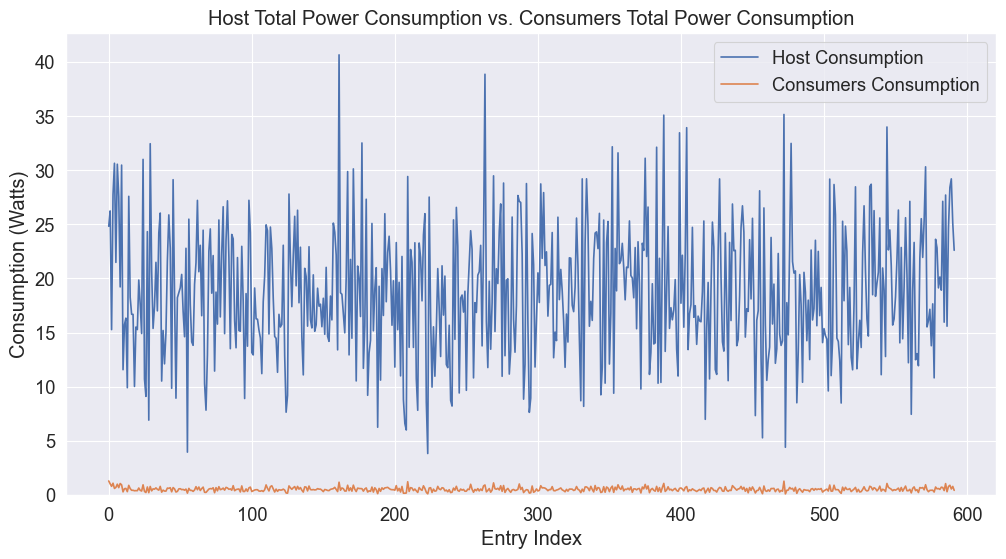

In [102]:
sns.set_theme(style="darkgrid")
sns.set_context("paper", font_scale=1.5)  # Adjust font_scale to set the uniform font size

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, dashes=False)
plt.xlabel("Entry Index")
plt.ylabel("Consumption (Watts)")
plt.title("Host Total Power Consumption vs. Consumers Total Power Consumption")
plt.ylim(0)  # Set the y-axis limit to start at 0
plt.legend()
plt.savefig('data/power_consumption.pdf', format='pdf', bbox_inches='tight')
plt.show()

Container Name
ce-p4-1-0     12.583690
scaphandre     9.865984
Name: Container CPU Usage, dtype: float64


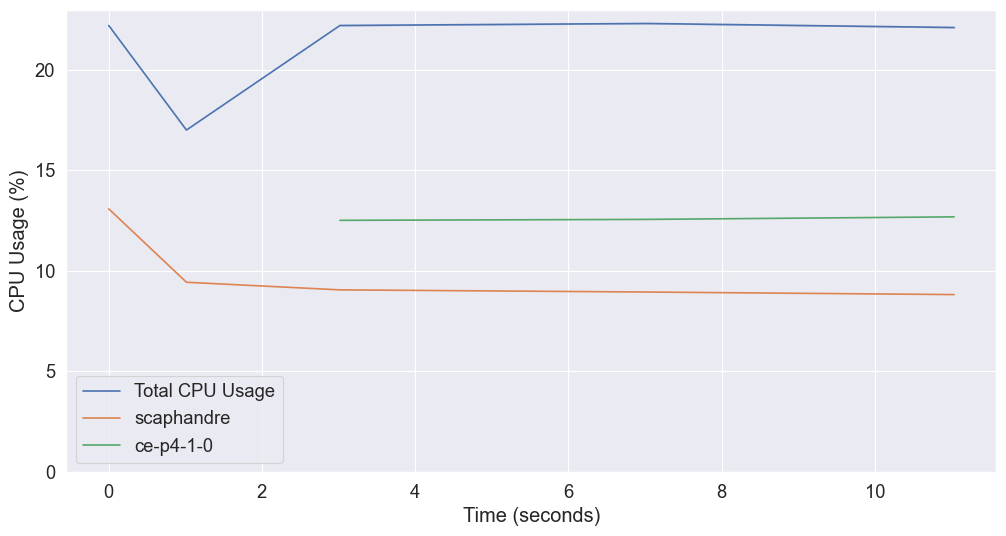

In [103]:
# Read the CSV file into a DataFrame
dfcpu = pd.read_csv('data/cpu_usages.csv')

# Convert the 'Timestamp' column to datetime
dfcpu['Timestamp'] = pd.to_datetime(dfcpu['Timestamp'], unit='s')

# Normalize the timestamps to start at 0
dfcpu['Normalized Timestamp'] = (dfcpu['Timestamp'] - dfcpu['Timestamp'].min()).dt.total_seconds()

# Calculate the average CPU usage for each container
container_avg_cpu = dfcpu.groupby('Container Name')['Container CPU Usage'].mean()

# Print the average CPU usage for each container
print(container_avg_cpu)

# Initialize the plot
plt.figure(figsize=(12, 6))

# Plot the total CPU usage
sns.lineplot(x='Normalized Timestamp', y='Total CPU Usage', data=dfcpu, label='Total CPU Usage')

# Plot the CPU usage of each container
for container_name in dfcpu['Container Name'].unique():
    container_df = dfcpu[dfcpu['Container Name'] == container_name]
    sns.lineplot(x='Normalized Timestamp', y='Container CPU Usage', data=container_df, label=container_name)



# Add plot labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('CPU Usage (%)')
plt.ylim(0)  # Set the y-axis limit to start at 0
plt.legend()
plt.savefig('data/cpu_usage_plot.pdf', format='pdf', bbox_inches='tight')
plt.show()
